In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sources')
from MSP import MSP

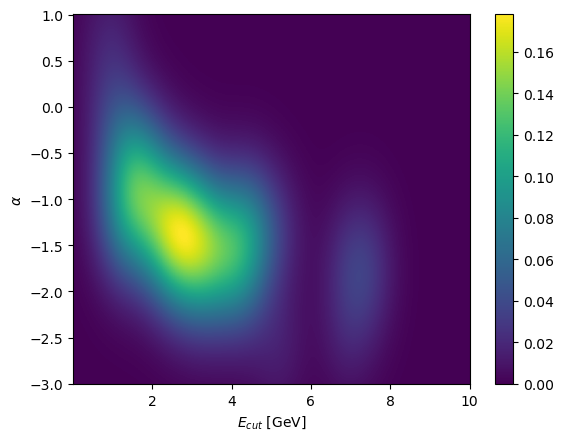

In [5]:
file_path = '../../data/MSP/1407_5583.txt'
my_MSP = MSP(file_path)
norm = np.sum(my_MSP.Ecut_alpha_PDF*(my_MSP.Ecut_vals[1] - my_MSP.Ecut_vals[0])*(my_MSP.alpha_vals[1] - my_MSP.alpha_vals[0]))
fig, ax = plt.subplots()
pc = ax.pcolormesh(my_MSP.Ecut_vals/1000, my_MSP.alpha_vals, my_MSP.Ecut_alpha_PDF.T/norm*1000, shading='auto', rasterized = True)
ax.set_xlabel(r'$E_{cut}$ [GeV]')
ax.set_ylabel(r'$\alpha$')
fig.colorbar(pc)
fig.savefig('../../gc_jobs/figures/MSP_dist.pdf', dpi = 200)

(array([[ 0.,  0.,  0., ..., 16., 14., 10.],
        [ 0.,  0.,  0., ..., 17., 28., 16.],
        [ 0.,  0.,  0., ..., 18., 22., 19.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  10. ,  105.8,  201.6,  297.4,  393.2,  489. ,  584.8,  680.6,
         776.4,  872.2,  968. , 1063.8, 1159.6, 1255.4, 1351.2, 1447. ,
        1542.8, 1638.6, 1734.4, 1830.2, 1926. , 2021.8, 2117.6, 2213.4,
        2309.2, 2405. , 2500.8, 2596.6, 2692.4, 2788.2, 2884. , 2979.8,
        3075.6, 3171.4, 3267.2, 3363. , 3458.8, 3554.6, 3650.4, 3746.2,
        3842. , 3937.8, 4033.6, 4129.4, 4225.2, 4321. , 4416.8, 4512.6,
        4608.4, 4704.2, 4800. , 4895.8, 4991.6, 5087.4, 5183.2, 5279. ,
        5374.8, 5470.6, 5566.4, 5662.2, 5758. , 5853.8, 5949.6, 6045.4,
        6141.2, 6237. , 6332.8, 6428.6, 6524.4, 6620.2, 6716. , 6811.8,
        6907.6, 7003.4, 7099.2, 7195. , 7290.8, 7386.6, 7482.4, 757

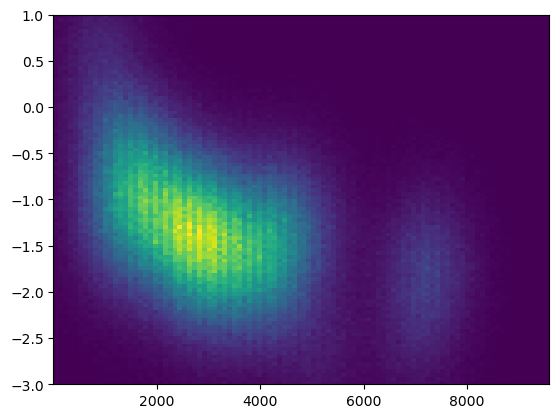

In [3]:
Ecut_i, alpha_i = my_MSP.draw_from_2D_pdf(my_MSP.Ecut_alpha_PDF, Ndraws = 1000000)
Ecut = my_MSP.Ecut_vals[Ecut_i]
alpha = my_MSP.alpha_vals[alpha_i]
plt.hist2d(Ecut, alpha, bins = 100)

peak (Ecut, alpha) = (2770.0,-1.3863863863863863)
stacked (Ecut, alpha) = (3780,-1.57)


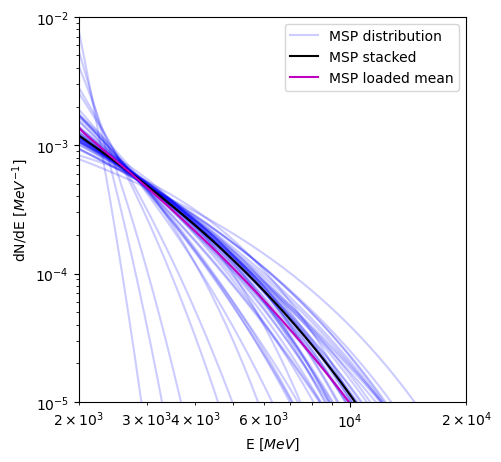

In [8]:
energy_range = [2000, 100000] #this is in MeV
energy = np.geomspace(energy_range[0], energy_range[1], 10000)
num_spectra = 50
def norm(spectra, energy):
    return np.tile(np.sum(spectra*(energy[1]-energy[0]), axis = 1), (energy.size, 1)).T
spectra = my_MSP.MSP_spectra(energy, num_spectra)
stacked = my_MSP.MSP_spectra(energy, 1, fixed_spectra = True, Ecut = 3780, alpha = -1.57)
peak = my_MSP.MSP_spectra(energy, 1, fixed_spectra = True)
mean = np.sum(spectra, axis = 0)
loaded_mean = my_MSP.MSP_spectra_load(energy, '../../data/MSP/mean_spectrum.npy', num_spectra = 1)
spectra = spectra/norm(spectra,energy)
stacked = stacked/norm(stacked,energy)
peak = peak/norm(peak,energy)
mean = mean/norm(np.array([mean]),energy)
loaded_mean = loaded_mean/norm(loaded_mean,energy)
prob1e = energy[np.searchsorted(np.cumsum(stacked*(energy[1]-energy[0])), 1 - 1/10000)]
fig, ax = plt.subplots(figsize = (5,5))

for i in range(num_spectra):
    if i == 0:
        ax.plot(energy, spectra[0,:], label = 'MSP distribution', color = 'b', alpha = 0.2)
    else:
        ax.plot(energy, spectra[i,:], color = 'b', alpha = 0.2)

ax.plot(energy, stacked[0,:], label = 'MSP stacked', color = 'k')
#ax.plot(energy, peak[0,:], label = 'MSP peak', color = 'r')
#ax.plot(energy, mean[0,:], label = 'MSP mean', color = 'y')
ax.plot(energy, loaded_mean[0,:], label = 'MSP loaded mean', color = 'm')
#ax.vlines(prob1e, np.min(spectra), np.max(spectra), linestyles = 'dashed', color = 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'E $[MeV]$')
ax.set_ylabel(r'dN/dE $[MeV^{-1}]$')
ax.set_ylim(1e-5, 1e-2)
ax.set_xlim(2e3, 2e4)
ax.legend()

max_i = np.unravel_index(np.argmax(my_MSP.Ecut_alpha_PDF), my_MSP.Ecut_alpha_PDF.shape)
Ecut_max, alpha_max = my_MSP.Ecut_vals[max_i[0]], my_MSP.alpha_vals[max_i[1]]
print(f'peak (Ecut, alpha) = ({Ecut_max},{alpha_max})')
print('stacked (Ecut, alpha) = (3780,-1.57)')

In [29]:
np.save('../../data/MSP/mean_spectrum', np.array([energy, mean[0,:]]))